# Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, recall_score,
                             roc_curve,
                             precision_score,roc_auc_score,
                             confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 74)
sns.set_context('notebook')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

# Data Description

In [3]:
description = pd.read_excel('/content/drive/MyDrive/Learning Data Science/Project Data Scientist - ID X Partners/Dataset/LCDataDictionary.xlsx', sheet_name='Sheet3')

In [4]:
description

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,member_id,A unique LC assigned Id for the borrower member.,id unik LC untuk setiap anggota peminjam
1,loan_amn,Last month payment was received,pembayaran yang diterima bulan lalu
2,funded_amnt,The total amount committed to that loan at tha...,komitment total pembayaran setiap bulannya
3,funded_amnt_inv,?,NaN
4,term,The number of payments on the loan. Values are...,berapa bulan ia meminjam
5,int_rate,"Indicates if income was verified by LC, not ve...",tingkat rating verified LC
6,installment,The monthly payment owed by the borrower if th...,NaN
7,grade,NaN,NaN
8,sub_grade,NaN,NaN
9,emp_title,pekerjaan member,NaN


# Load Data

In [5]:
df_raw = pd.read_csv('/content/drive/MyDrive/Learning Data Science/Project Data Scientist - ID X Partners/Dataset/loan_data_2007_2014.csv')

In [6]:
df_raw

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

# Check Data

In [7]:
# Delete column Unnamed
df_raw.drop('Unnamed: 0', inplace=True, axis=1)

In [8]:
df_raw

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,N

In [9]:
# Check data type
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [10]:
# Check duplicate data
df_raw.duplicated().sum()

0

Terlihat bahwa tidak ada id yang terduplikat, artinya setiap baris telah mewakili satu individu

In [11]:
# Check Null Value
null_counts = df_raw.isnull().sum()
total_rows = df_raw.shape[0]
null_percentage = (null_counts / total_rows) * 100

null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
null_df = null_df.sort_values(by='Null Percentage', ascending=False)

null_df.reset_index(inplace=True)
null_df.rename(columns={'index': 'Feature'}, inplace=True)

null_df[['Feature', 'Null Count', 'Null Percentage']]

,Feature,Null Count,Null Percentage
0,inq_last_12m,466285,100.000000
1,verification_status_joint,466285,100.000000
2,open_acc_6m,466285,100.000000
3,open_il_6m,466285,100.000000
4,open_il_12m,466285,100.000000
5,open_il_24m,466285,100.000000
6,mths_since_rcnt_il,466285,100.000000
7,dti_joint,466285,100.000000
8,total_bal_il,466285,100.000000
9,annual_inc_joint,466285,100.000000


In [12]:
feature_null = [# unique id
                'id'
                , 'member_id'

                # free text
                , 'url'
                , 'desc'

                # all null / constant / others
                , 'zip_code'
                , 'annual_inc_joint'
                , 'dti_joint'
                , 'verification_status_joint'
                , 'open_acc_6m'
                , 'open_il_6m'
                , 'open_il_12m'
                , 'open_il_24m'
                , 'mths_since_rcnt_il'
                , 'total_bal_il'
                , 'il_util'
                , 'open_rv_12m'
                , 'open_rv_24m'
                , 'max_bal_bc'
                , 'all_util'
                , 'inq_fi'
                , 'total_cu_tl'
                , 'inq_last_12m'

                # expert judgment
                , 'sub_grade']
df_raw[feature_null]

,id,member_id,url,desc,zip_code,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,sub_grade
0,1077501,1296599,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,860xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2
1,1077430,1314167,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,309xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C4
2,1077175,1313524,https://www.lendingclub.com/browse/loanDetail....,NaN,606xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C5
3,1076863,1277178,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,917xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C1
4,1075358,1311748,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,972xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,https://www.lendingclub.com/browse/loanDetail....,NaN,773xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C2
466281,9684700,11536848,https://www.lendingclub.com/browse/loanDetail....,NaN,377xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D5
466282,9584776,11436914,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,458xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D1
466283,9604874,11457002,https://www.lendingclub.com/browse/loanDetail....,NaN,913xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A4


In [13]:
df = df_raw.drop(feature_null, axis = 1)

In [14]:
# Check Null Value
null_counts = df.isnull().sum()
total_rows = df.shape[0]
null_percentage = (null_counts / total_rows) * 100

null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
null_df = null_df.sort_values(by='Null Percentage', ascending=False)

null_df.reset_index(inplace=True)
null_df.rename(columns={'index': 'Feature'}, inplace=True)

null_df[['Feature', 'Null Count', 'Null Percentage']]

,Feature,Null Count,Null Percentage
0,mths_since_last_record,403647,86.566585
1,mths_since_last_major_derog,367311,78.773926
2,mths_since_last_delinq,250351,53.690554
3,next_pymnt_d,227214,48.728567
4,total_rev_hi_lim,70276,15.071469
5,tot_cur_bal,70276,15.071469
6,tot_coll_amt,70276,15.071469
7,emp_title,27588,5.916553
8,emp_length,21008,4.505399
9,last_pymnt_d,376,0.080637


In [15]:
# Check Unique Value of the data
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
    print()

loan_amnt int64
500 35000

funded_amnt int64
500 35000

funded_amnt_inv float64
0.0 35000.0

term object
[' 36 months' ' 60 months']

int_rate float64
5.42 26.06

installment float64
15.67 1409.99

grade object
['B' 'C' 'A' 'E' 'F' 'D' 'G']

emp_title object
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length object
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership object
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

annual_inc float64
1896.0 7500000.0

verification_status object
['Verified' 'Source Verified' 'Not Verified']

issue_d object
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09

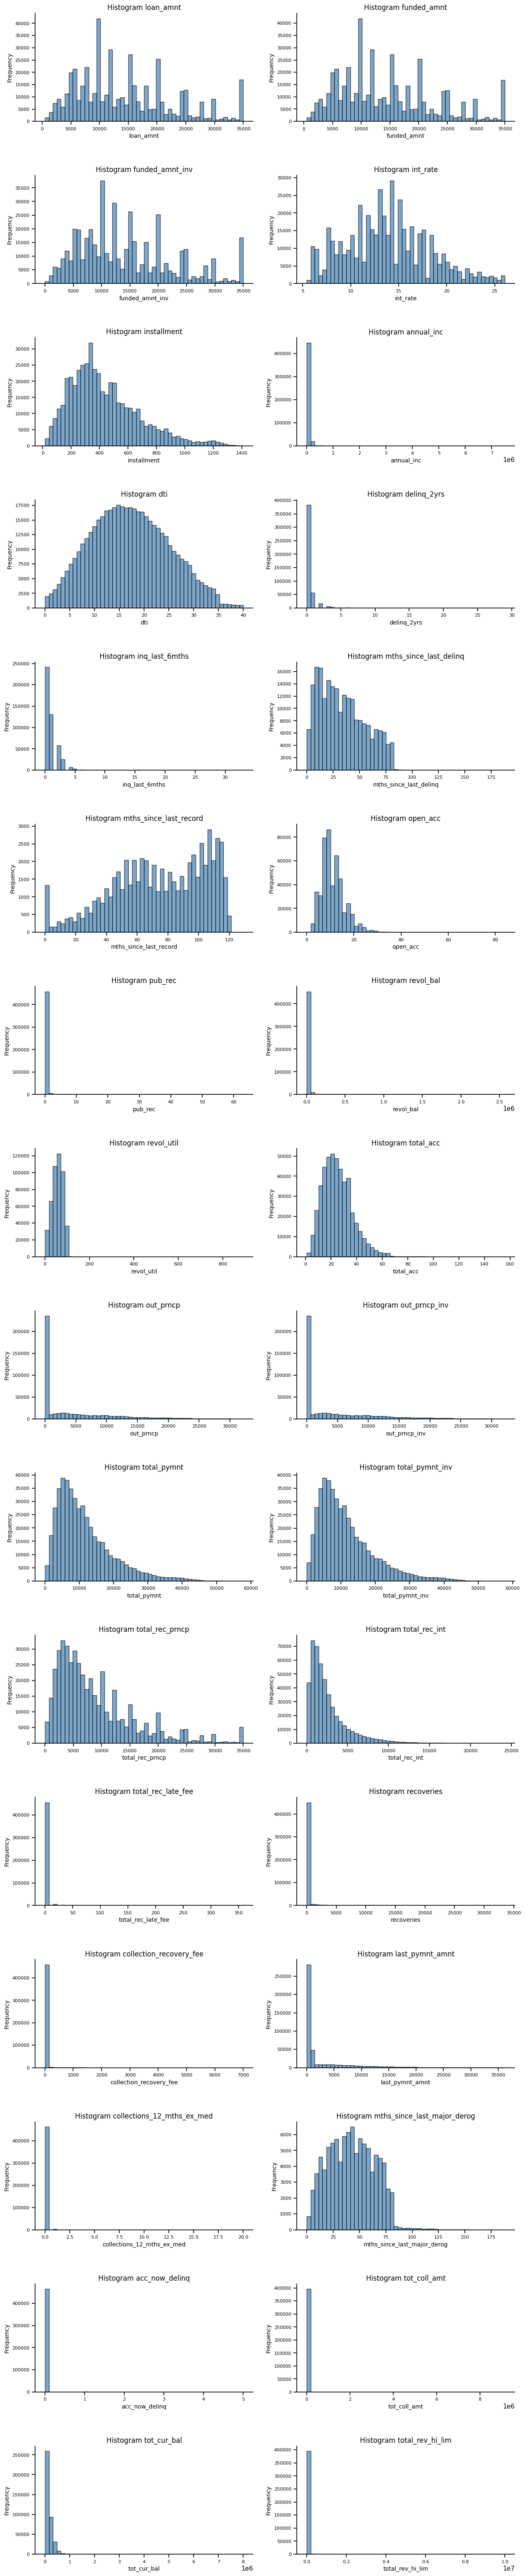

In [16]:
# Check Data Distribution
df_plot = df.select_dtypes(include=['float', 'int'])
df_plot.drop(columns=['policy_code'], inplace=True)

numeric = df_plot.columns

edgecolor = 'black'
alpha = 0.7

titles = ["Histogram " + col for col in numeric]

nrows = (len(numeric) + 1) // 2

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5 * nrows))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]
    n, bins, patches = ax.hist(df[col], bins=50, color='steelblue', alpha=alpha, edgecolor=edgecolor)
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for i in range(len(numeric), nrows * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()

# Define Target Variable

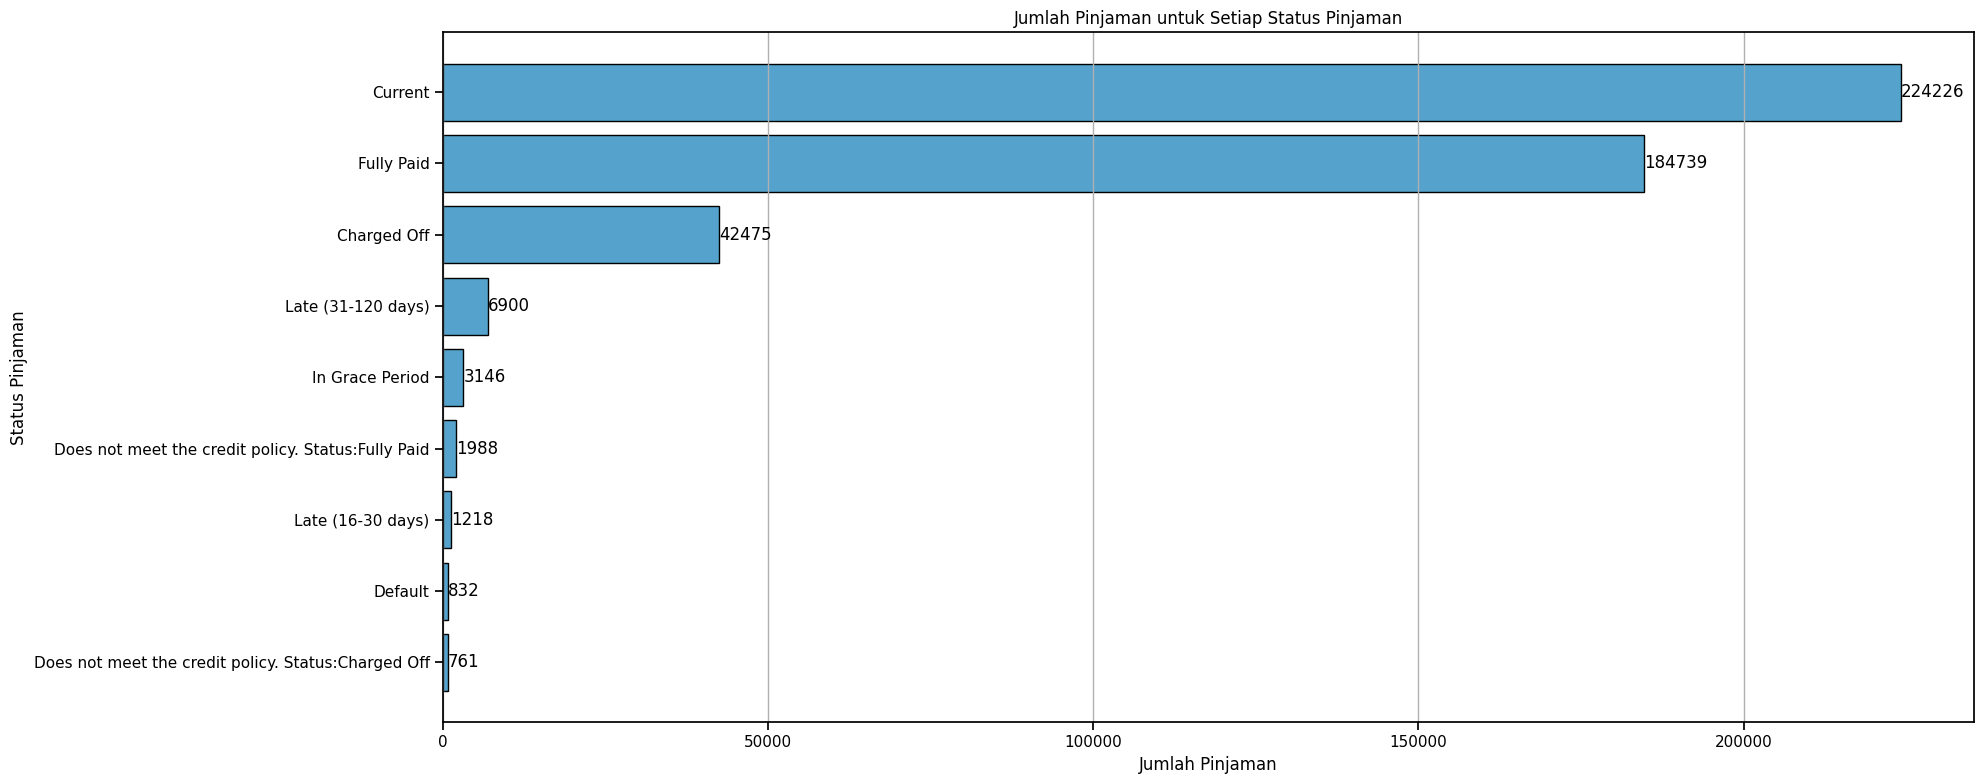

Presentase masing-masing value dari loan_status:
Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [17]:
loan_counts_by_status = df['loan_status'].value_counts()
loan_counts_by_status_sorted = loan_counts_by_status.sort_values(ascending=False)

plt.figure(figsize=(20, 8))
bars = plt.barh(loan_counts_by_status_sorted.index, loan_counts_by_status_sorted.values, edgecolor='black')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='left', va='center')

plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Status Pinjaman')
plt.title('Jumlah Pinjaman untuk Setiap Status Pinjaman')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

total_loans = loan_counts_by_status_sorted.sum()
percentages = (loan_counts_by_status_sorted / total_loans) * 100
print("Presentase masing-masing value dari loan_status:")
print(percentages.apply(lambda x: f"{x:.2f}%"))

`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

In [18]:
bad = ['Charged Off',
       'Default', 'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)']

df['bad_flag'] = np.where(df['loan_status'].isin(bad), 1, 0)

In [19]:
df.drop('loan_status', axis = 1, inplace = True)

In [20]:
df['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

Presentase masing-masing value dari loan_status:


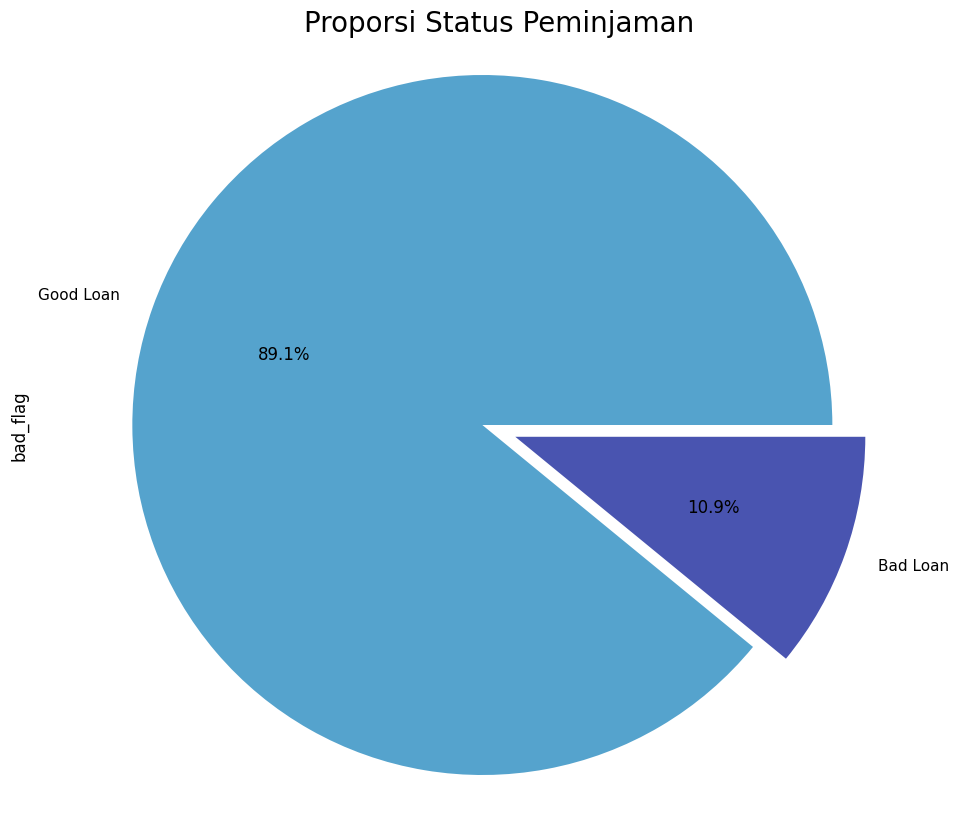

In [21]:
plt.figure(figsize=(12, 10))
plt.title("Proporsi Status Peminjaman", fontsize=20)
df["bad_flag"].value_counts().plot.pie(explode=[0.05, 0.05], labels=["Good Loan", "Bad Loan"], autopct='%1.1f%%')
plt.axis('equal')

print("Presentase masing-masing value dari loan_status:")

# EDA (Exploratory Data Analysis)

## Loan Status Analysis

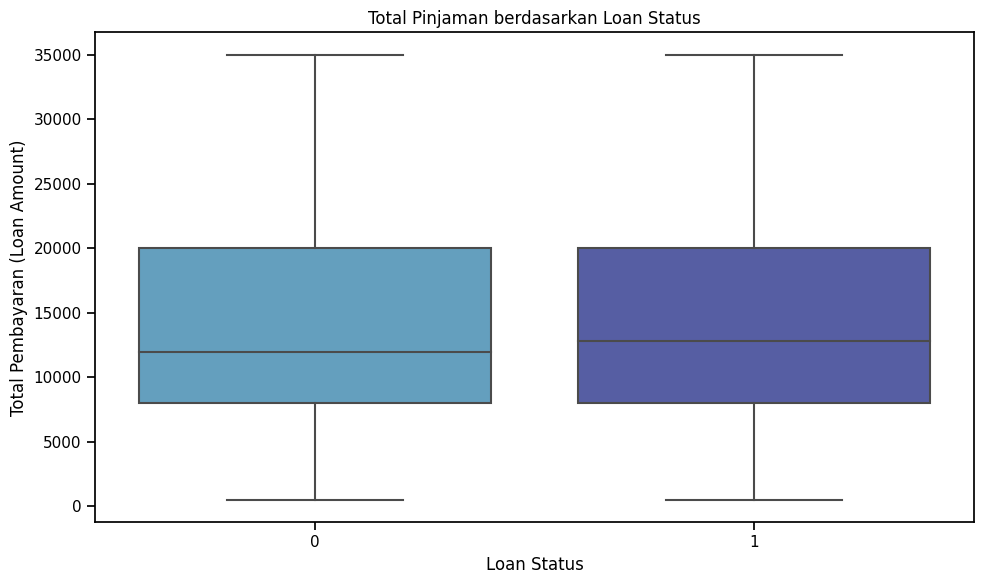

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bad_flag', y='loan_amnt')

plt.xlabel('Loan Status')
plt.ylabel('Total Pembayaran (Loan Amount)')
plt.title('Total Pinjaman berdasarkan Loan Status')
plt.tight_layout()
plt.show()

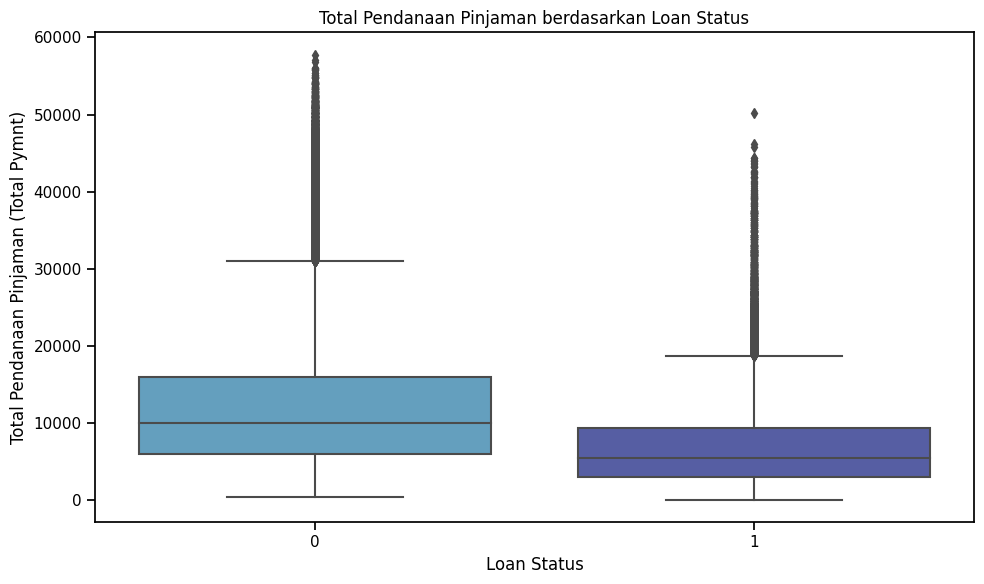

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bad_flag', y='total_pymnt')

plt.xlabel('Loan Status')
plt.ylabel('Total Pendanaan Pinjaman (Total Pymnt)')
plt.title('Total Pendanaan Pinjaman berdasarkan Loan Status')
plt.tight_layout()
plt.show()

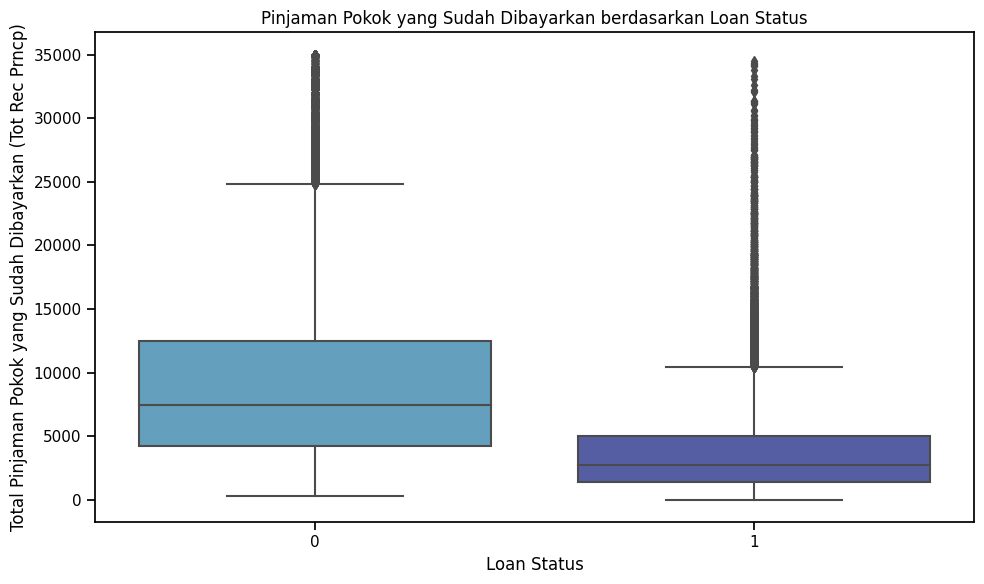

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bad_flag', y='total_rec_prncp', data=df)

plt.xlabel('Loan Status')
plt.ylabel('Total Pinjaman Pokok yang Sudah Dibayarkan (Tot Rec Prncp)')
plt.title('Pinjaman Pokok yang Sudah Dibayarkan berdasarkan Loan Status')
plt.tight_layout()
plt.show()

## Analysis of Average Loans

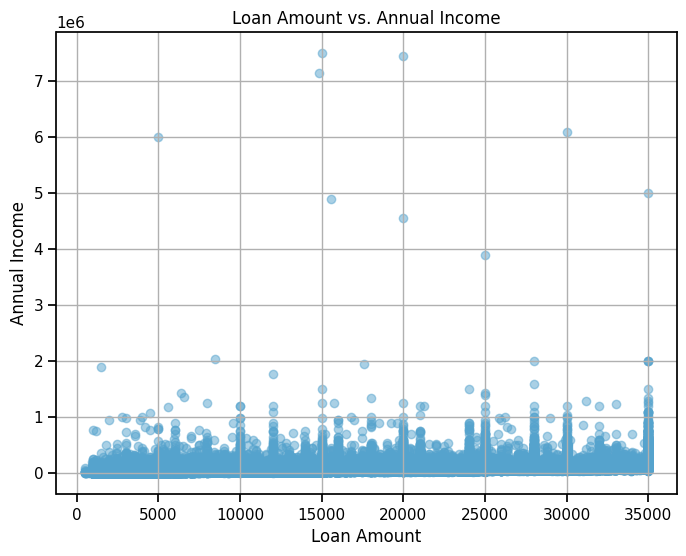

Rata-rata Annual Income untuk Loan Amount 0 - 17500: 61,796.42
Annual Income Tertinggi untuk Loan Amount 0 - 17500: 7,500,000.00
Rata-rata Annual Income untuk Loan Amount 17500 - 35000: 98,264.15
Annual Income Tertinggi untuk Loan Amount 17500 - 35000: 7,446,395.00


In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['loan_amnt'], df['annual_inc'], alpha=0.5)
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs. Annual Income')
plt.grid(True)
plt.show()

loan_amount_range_1 = df[(df['loan_amnt'] >= 0) & (df['loan_amnt'] <= 17500)]
mean_income_range_1 = loan_amount_range_1['annual_inc'].mean()
max_income_range_1 = loan_amount_range_1['annual_inc'].max()

loan_amount_range_2 = df[(df['loan_amnt'] > 17500) & (df['loan_amnt'] <= 35000)]
mean_income_range_2 = loan_amount_range_2['annual_inc'].mean()
max_income_range_2 = loan_amount_range_2['annual_inc'].max()

print("Rata-rata Annual Income untuk Loan Amount 0 - 17500: {:,.2f}".format(mean_income_range_1))
print("Annual Income Tertinggi untuk Loan Amount 0 - 17500: {:,.2f}".format(max_income_range_1))

print("Rata-rata Annual Income untuk Loan Amount 17500 - 35000: {:,.2f}".format(mean_income_range_2))
print("Annual Income Tertinggi untuk Loan Amount 17500 - 35000: {:,.2f}".format(max_income_range_2))

## Interest Rate Analysis (Interest Rate)

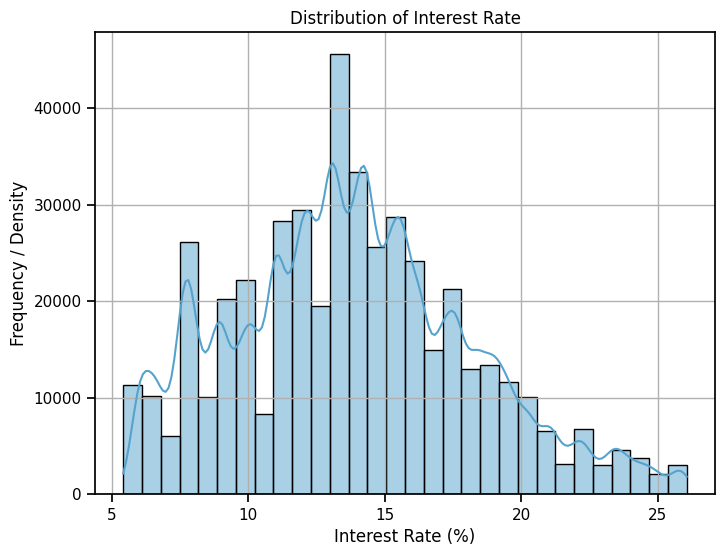

Tingkat Bunga Maksimum: 26.06%
Tingkat Bunga Minimum: 5.42%
Tingkat Bunga Rata-rata: 13.83%


In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['int_rate'], bins=30, kde=True, edgecolor='black')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Interest Rate')
plt.grid(True)
plt.show()

max_int_rate = df['int_rate'].max()
min_int_rate = df['int_rate'].min()
mean_int_rate = df['int_rate'].mean()

print("Tingkat Bunga Maksimum: {:.2f}%".format(max_int_rate))
print("Tingkat Bunga Minimum: {:.2f}%".format(min_int_rate))
print("Tingkat Bunga Rata-rata: {:.2f}%".format(mean_int_rate))

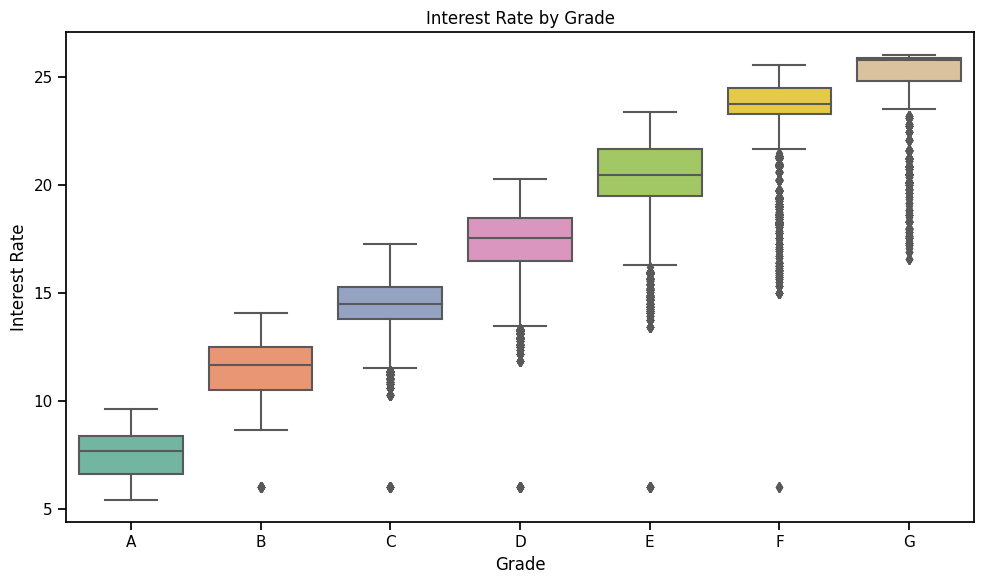

In [27]:
plt.figure(figsize=(10, 6))
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.boxplot(x='grade', y='int_rate', data=df, order=grade_order, palette='Set2')

plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Interest Rate by Grade')
plt.tight_layout()
plt.show()

## Loan Purpose Analysis

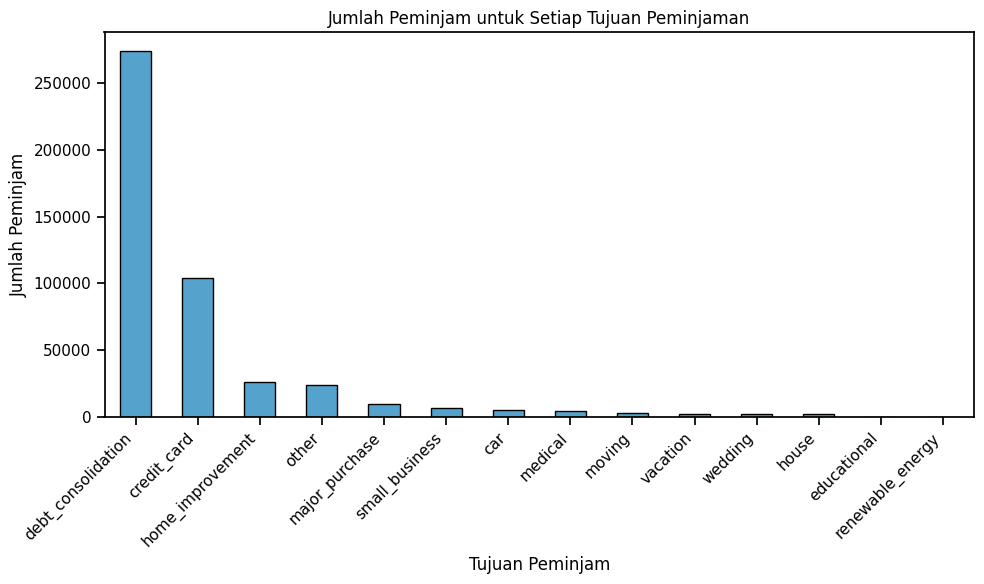

Jumlah Pinjaman untuk Setiap Tujuan:
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

Tujuan Peminjaman yang Paling Umum:  debt_consolidation
Jumlah Peminjaman untuk Tujuan Tersebut:  274195


In [28]:
loan_counts_by_purpose = df['purpose'].value_counts()

plt.figure(figsize=(10, 6))
loan_counts_by_purpose.plot(kind='bar', edgecolor='black')
plt.xlabel('Tujuan Peminjam')
plt.ylabel('Jumlah Peminjam')
plt.title('Jumlah Peminjam untuk Setiap Tujuan Peminjaman')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Jumlah Pinjaman untuk Setiap Tujuan:")
print(loan_counts_by_purpose)

most_common_purpose = loan_counts_by_purpose.idxmax()
most_common_count = loan_counts_by_purpose.max()

print("\nTujuan Peminjaman yang Paling Umum: ", most_common_purpose)
print("Jumlah Peminjaman untuk Tujuan Tersebut: ", most_common_count)

## Credit Quality Analysis

<Figure size 1000x600 with 0 Axes>

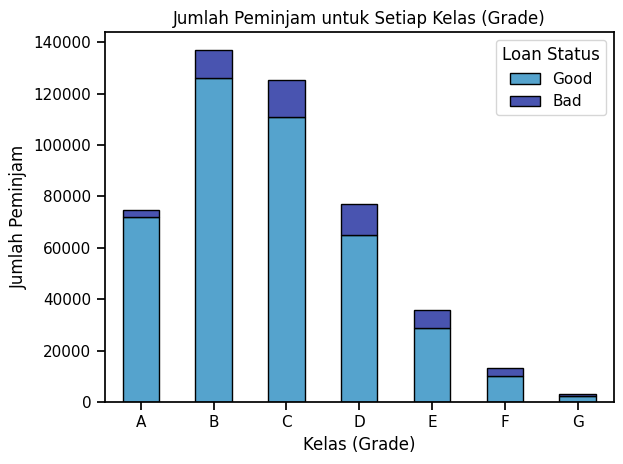

bad_flag,0,1
grade,,
A,71970,2897
B,126170,10759
C,110909,14384
D,65040,11848
E,28793,6964
F,10037,3192
G,2398,924


In [29]:
loan_counts_by_grade_status = df.groupby(['grade', 'bad_flag']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
loan_counts_by_grade_status.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Kelas (Grade)')
plt.ylabel('Jumlah Peminjam')
plt.title('Jumlah Peminjam untuk Setiap Kelas (Grade)')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', loc='upper right', labels=['Good','Bad'])
plt.tight_layout()
plt.show()
loan_counts_by_grade_status

## Long Working Analysis

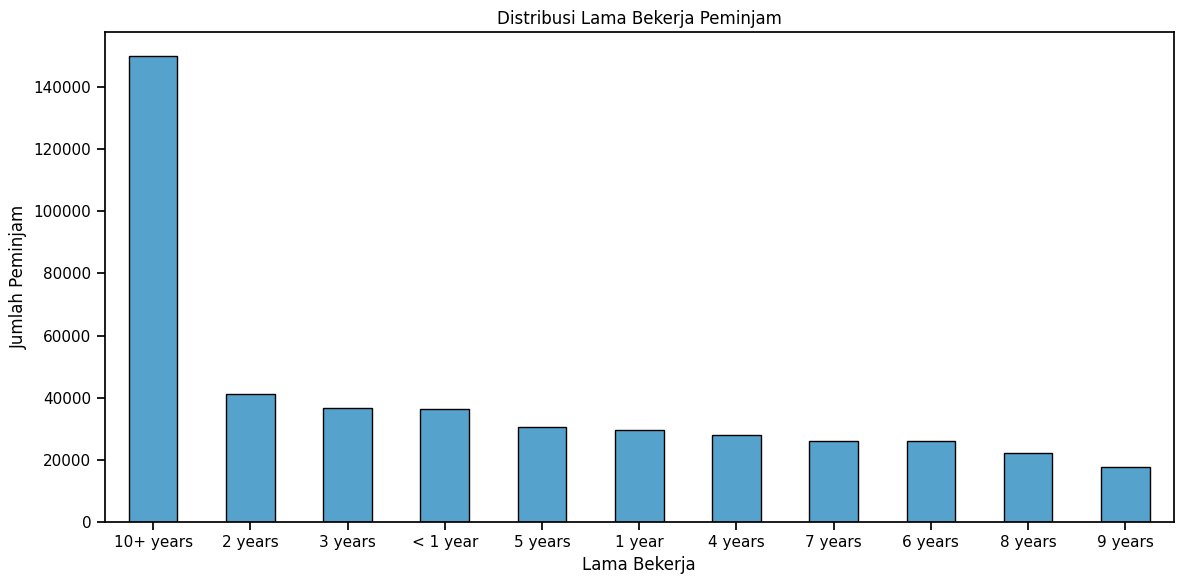

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64


<Figure size 1200x600 with 0 Axes>

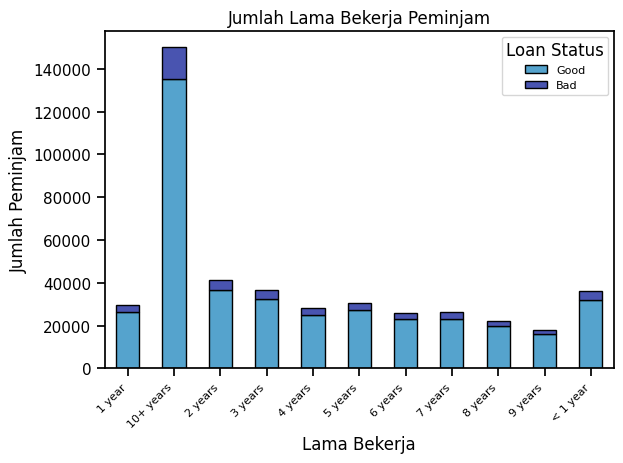

bad_flag,0,1
emp_length,,
1 year,26308,3314
10+ years,135097,14952
2 years,36832,4541
3 years,32588,4008
4 years,24952,3071
5 years,27236,3538
6 years,23054,3058
7 years,23265,2915
8 years,19930,2465


In [30]:
plt.figure(figsize=(12, 6))
df['emp_length'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Lama Bekerja')
plt.ylabel('Jumlah Peminjam')
plt.title('Distribusi Lama Bekerja Peminjam')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print(df['emp_length'].value_counts())

loan_counts_by_emp_length = df.groupby(['emp_length', 'bad_flag']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
loan_counts_by_emp_length.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Lama Bekerja')
plt.ylabel('Jumlah Peminjam')
plt.title('Jumlah Lama Bekerja Peminjam')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.legend(title='Loan Status', loc='upper right', labels=['Good', 'Bad'], fontsize=8)
plt.tight_layout()
plt.show()
loan_counts_by_emp_length

## Home Ownership Analysis

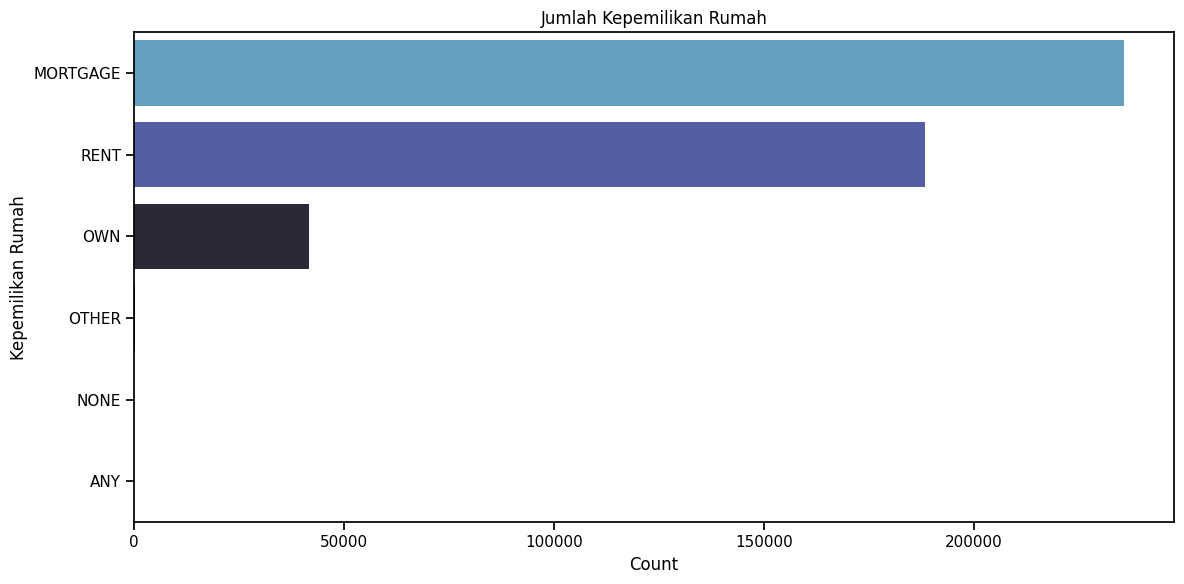

In [31]:
home_ownership_counts = df['home_ownership'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='home_ownership', order=home_ownership_counts.index)

plt.xlabel('Count')
plt.ylabel('Kepemilikan Rumah')
plt.title('Jumlah Kepemilikan Rumah')
plt.tight_layout()
plt.show()

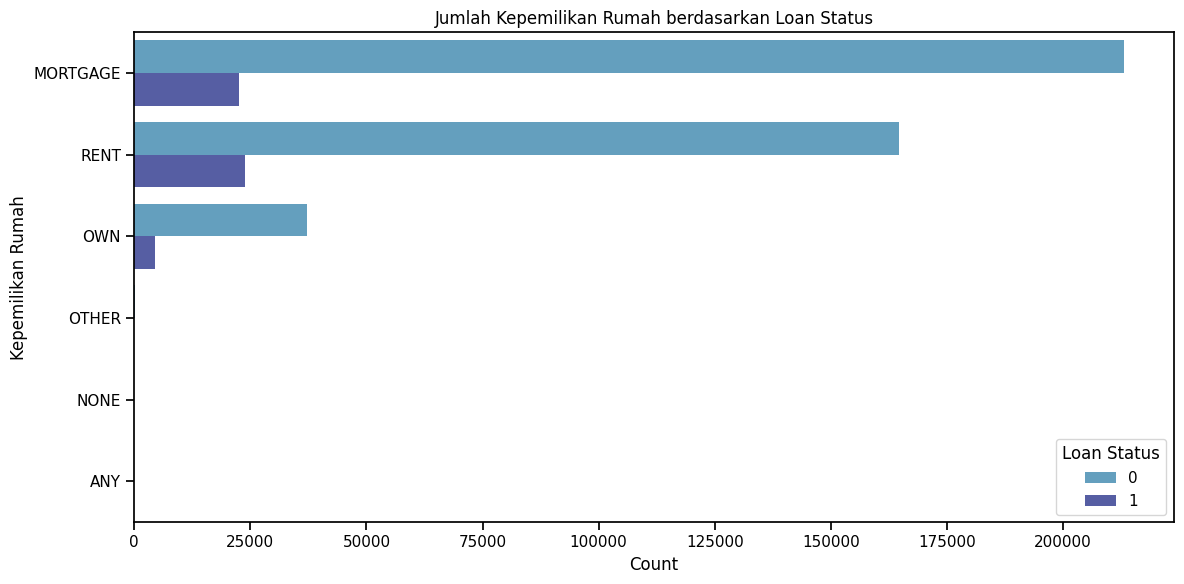

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='home_ownership', order=home_ownership_counts.index, hue='bad_flag')

plt.xlabel('Count')
plt.ylabel('Kepemilikan Rumah')
plt.title('Jumlah Kepemilikan Rumah berdasarkan Loan Status')
plt.legend(title='Loan Status', loc='lower right')
plt.tight_layout()
plt.show()

# Data Preprocessing

## emp_length

In [33]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [34]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

In [35]:
# change data type from string to float
df['emp_length_int'] = df['emp_length_int'].astype(float)
# drop variable emp_length
df.drop('emp_length', axis = 1, inplace = True)

## term

In [36]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [37]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(float)
df.drop('term', axis = 1, inplace = True)

## earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [38]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [39]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [40]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat terdapat data yang aneh yaitu terdapat nilai yang negatif. mari coba kita cek

In [41]:
df[df['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'mths_since_earliest_cr_line']]

,earliest_cr_line,mths_since_earliest_cr_line
1580,2062-09-01,-537.0
1770,2068-09-01,-609.0
2799,2064-09-01,-561.0
3282,2067-09-01,-597.0
3359,2065-02-01,-566.0
...,...,...
464003,2068-01-01,-601.0
464260,2066-07-01,-583.0
465100,2067-10-01,-598.0
465500,2067-09-01,-597.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

In [42]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()
df.drop('earliest_cr_line', axis = 1, inplace = True)

## issue_d

In [43]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [44]:
df['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [45]:
df.drop(['issue_d', 'issue_d_date'], axis = 1, inplace = True)

## last_pymnt_d

In [46]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [47]:
df['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [48]:
df.drop(['last_pymnt_d_date', 'last_pymnt_d'], axis = 1, inplace = True)

## next_pymnt_date

In [49]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [50]:
df['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [51]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

## last_credit_pull_d

In [52]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_since_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [53]:
df['mths_since_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_credit_pull_d, dtype: float64

In [54]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis = 1, inplace = True)

## Correlation

<Axes: >

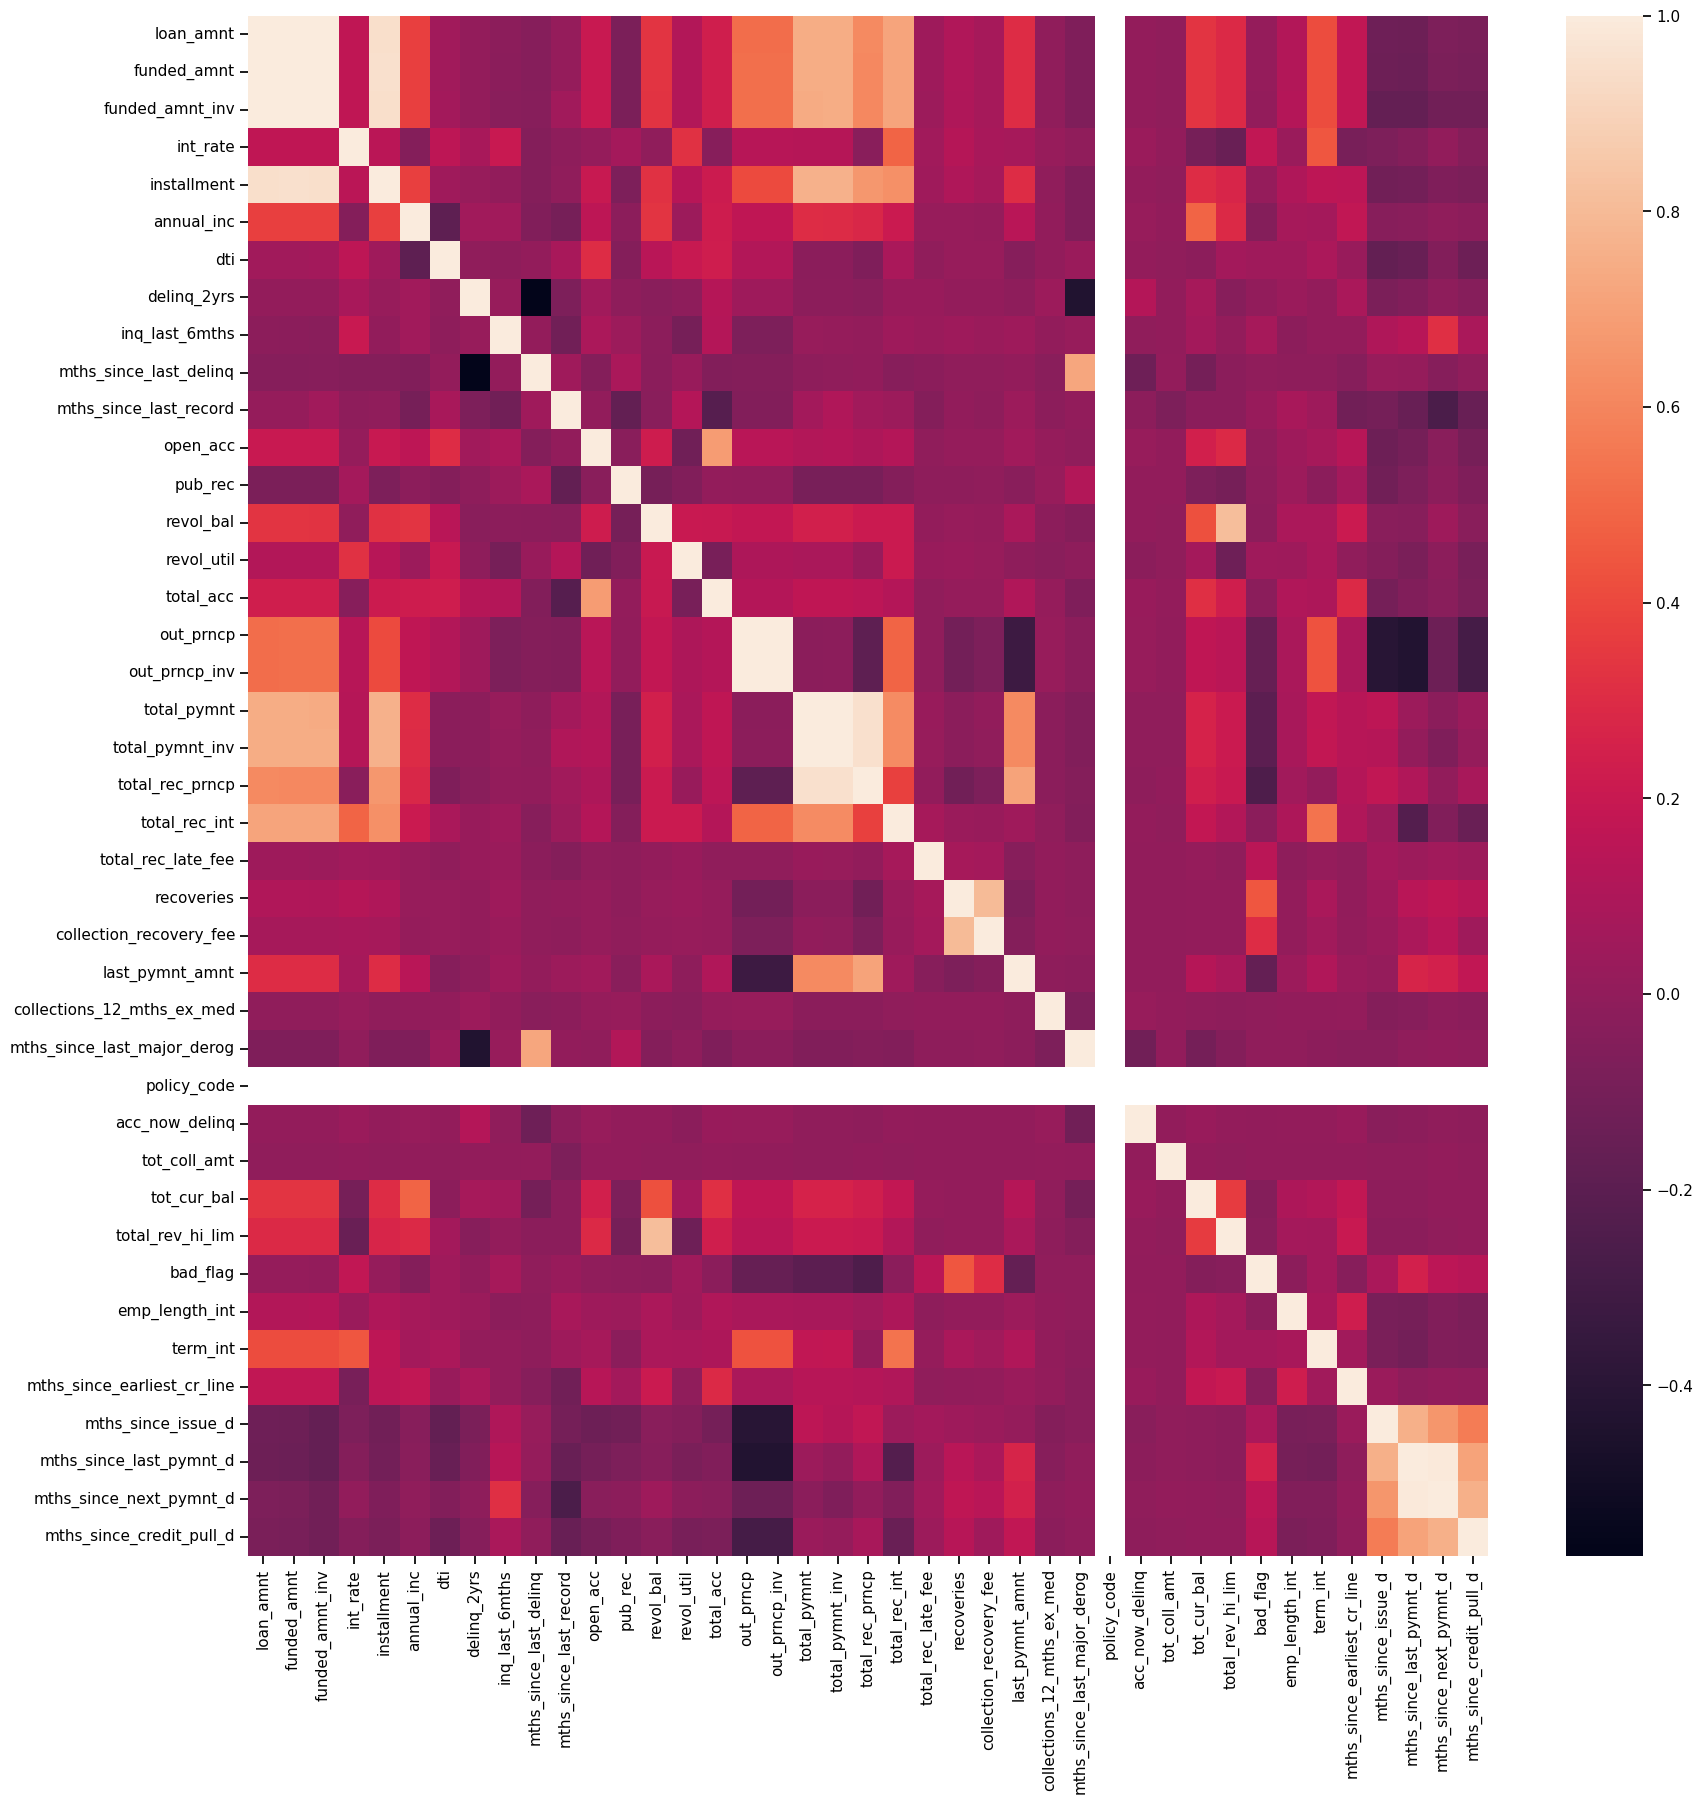

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [56]:
correlation_matrix = df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k = 1).astype(np.bool))
to_drop_hi_corr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [57]:
upper

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_credit_pull_d
loan_amnt,NaN,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006841,0.020328,0.041361,0.011523,0.204182,0.081137,0.331423,0.117756,0.235262,0.518700,0.518660,0.743841,0.743580,0.612777,0.715876,0.043650,0.110691,0.077336,0.304243,0.008067,0.066374,NaN,0.006283,0.002859,0.332686,0.290208,0.011819,0.120165,0.412870,0.175537,0.129708,0.132307,0.075260,0.087215
funded_amnt,NaN,NaN,0.996125,0.167921,0.951787,0.370311,0.058673,0.007386,0.020970,0.041443,0.011622,0.204983,0.080593,0.331039,0.118885,0.235135,0.521451,0.521412,0.743363,0.743441,0.612318,0.715664,0.043350,0.110338,0.077190,0.304178,0.007822,0.066359,NaN,0.006472,0.002859,0.332683,0.290206,0.011003,0.120711,0.410862,0.174527,0.137281,0.137986,0.077626,0.091546
funded_amnt_inv,NaN,NaN,NaN,0.169353,0.947387,0.367806,0.062606,0.008143,0.027580,0.036670,0.056884,0.205807,0.078894,0.327436,0.120774,0.235456,0.525143,0.525115,0.738037,0.745460,0.607027,0.713460,0.038985,0.107944,0.073781,0.303105,0.007175,0.066301,NaN,0.006801,0.002858,0.332677,0.290185,0.007191,0.123738,0.412005,0.172087,0.165802,0.166856,0.115821,0.113529
int_rate,NaN,NaN,NaN,NaN,0.148790,0.046072,0.159657,0.079190,0.205641,0.046605,0.008992,0.012307,0.066695,0.004589,0.323365,0.033012,0.137427,0.137451,0.127035,0.129166,0.032130,0.485154,0.057875,0.127893,0.082198,0.075609,0.020306,0.006686,NaN,0.030338,0.000863,0.097316,0.146838,0.172361,0.030449,0.443395,0.090945,0.072497,0.046407,0.003917,0.050704
installment,NaN,NaN,NaN,NaN,NaN,0.368145,0.049919,0.017001,0.002247,0.045757,0.002599,0.196839,0.070093,0.320239,0.136852,0.215906,0.408838,0.408811,0.764360,0.763895,0.663399,0.641948,0.052341,0.105666,0.075344,0.299867,0.006055,0.066462,NaN,0.008923,0.002359,0.300639,0.270074,0.013936,0.104662,0.159631,0.156329,0.117993,0.112402,0.064754,0.079241
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,0.188548,0.058896,0.056675,0.058960,0.097235,0.157784,0.015439,0.332316,0.037582,0.224690,0.168316,0.168316,0.299784,0.298728,0.275823,0.212951,0.020273,0.016954,0.013680,0.142155,0.000445,0.068390,NaN,0.017133,0.001895,0.486086,0.291955,0.049864,0.073876,0.069949,0.170480,0.034951,0.027744,0.008165,0.019879
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003694,0.012541,0.007574,0.082449,0.303914,0.046192,0.143380,0.200412,0.228221,0.119984,0.119972,0.026007,0.021788,0.063895,0.089582,0.005747,0.021462,0.018084,0.043068,0.000308,0.029121,NaN,0.009491,0.003560,0.018384,0.060972,0.048102,0.049942,0.091912,0.027133,0.169451,0.152501,0.051885,0.134120
delinq_2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017985,0.573957,0.074626,0.059134,0.010810,0.031121,0.013183,0.130793,0.043857,0.043852,0.019697,0.018993,0.032098,0.024274,0.024428,0.004484,0.005382,0.013740,0.039147,0.437091,NaN,0.126532,0.000072,0.072699,0.035028,0.001227,0.030338,0.004135,0.089044,0.079630,0.058143,0.009308,0.044236
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005059,0.118432,0.092788,0.038328,0.015715,0.094701,0.124072,0.070402,0.070392,0.020644,0.014769,0.005306,0.044068,0.029995,0.042945,0.032718,0.041229,0.001804,0.017929,NaN,0.006918,0.001887,0.060198,0.008383,0.073102,0.016409,0.009975,0.004732,0.108139,0.137654,0.313767,0.084593
mths_since_last_delinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053133,0.047214,0.089453,0.025841,0.024544,0.057061,0.049304,0.049291,0.011731,0.007179,0.000683,0.038082,0.026263,0.006545,0.007625,0.006630,0.032314,0.72151

In [58]:
to_drop_hi_corr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_credit_pull_d']

In [59]:
df.drop(to_drop_hi_corr, axis = 1, inplace = True)

In [60]:
df

,loan_amnt,int_rate,grade,emp_title,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,10.65,B,NaN,RENT,24000.0,Verified,n,credit_card,Computer,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,0.00,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0,10.0,36.0,395.0,72.0
1,2500,15.27,C,Ryder,RENT,30000.0,Source Verified,n,car,bike,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,117.08,0.0,1,INDIVIDUAL,0.0,NaN,NaN,1,0.0,60.0,224.0,72.0
2,2400,15.96,C,NaN,RENT,12252.0,Not Verified,n,small_business,real estate business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,0.00,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0,10.0,36.0,193.0,72.0
3,10000,13.49,C,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,n,other,personel,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,16.97,0.00,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0,10.0,36.0,262.0,72.0
4,3000,12.69,B,University Medical Group,RENT,80000.0,Source Verified,n,other,Personal,OR,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,0.00,0.00,0.0,1,INDIVIDUAL,0.0,NaN,NaN,0,1.0,60.0,263.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,14.47,C,Financial Advisor,MORTGAGE,110000.0,Source Verified,n,debt_consolidation,Debt consolidation,TX,19.85,0.0,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,0.00,0.00,0.0,1,INDIVIDUAL,0.0,0.0,294998.0,0,4.0,60.0,176.0,47.0
466281,22000,19.97,D,Chief of Interpretation (Park Ranger),MORTGAGE,78000.0,Verified,n,debt_consolidation,Debt consolidation,TN,18.45,0.0,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,0.00,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,1,10.0,60.0,246.0,47.0
466282,20700,16.99,D,patrol,MORTGAGE,46000.0,Verified,n,debt_consolidation,Debt consolidation,OH,25.65,0.0,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,0.00,0.00,0.0,1,INDIVIDUAL,0.0,0.0,73598.0,0,7.0,60.0,192.0,47.0
466283,2000,7.90,A,Server Engineer Lead,OWN,83000.0,Verified,n,credit_card,Credit card refinancing,CA,5.39,3.0,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,0.00,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,0,3.0,36.0,178.0,47.0


## Drop Null Value

Dropping Null Value yang mempunyai null sebanyak 75%

In [61]:
# Check Null Value
null_counts = df.isnull().sum()
total_rows = df.shape[0]
null_percentage = (null_counts / total_rows) * 100

null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentage})
null_df = null_df.sort_values(by='Null Percentage', ascending=False)

null_df.reset_index(inplace=True)
null_df.rename(columns={'index': 'Feature'}, inplace=True)

null_df[['Feature', 'Null Count', 'Null Percentage']]

,Feature,Null Count,Null Percentage
0,mths_since_last_record,403647,86.566585
1,mths_since_last_delinq,250351,53.690554
2,tot_cur_bal,70276,15.071469
3,tot_coll_amt,70276,15.071469
4,emp_title,27588,5.916553
5,emp_length_int,21008,4.505399
6,revol_util,340,0.072917
7,collections_12_mths_ex_med,145,0.031097
8,inq_last_6mths,29,0.006219
9,total_acc,29,0.006219


In [62]:
drop_feature = null_percentage[null_percentage > 25].index.tolist()
df.drop(columns=drop_feature, inplace=True)

## Check Categorical Features

In [63]:
df.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [64]:
df.drop(['emp_title', 'title', 'application_type'], axis = 1, inplace = True)

In [65]:
for col in df.select_dtypes(include = 'object').columns.tolist():
  print(df[col].value_counts(normalize = True)*100)
  print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [66]:
df.drop('pymnt_plan', axis = 1, inplace = True)

## Check Numerical Features

In [67]:
df.select_dtypes(exclude = 'object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [68]:
df.drop('policy_code', axis = 1, inplace = True)

## Inputation

In [69]:
def analyze_and_visualize_column(df, column_name):
    """
    Fungsi untuk melakukan analisis distribusi dan visualisasi pada suatu kolom data.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    column_name (str): Nama kolom yang akan dianalisis.

    Returns:
    None
    """
    # Menghitung skewness dan kurtosis pada kolom data
    a = df[column_name].skew()
    b = df[column_name].kurtosis()

    print("\nSkewness '", column_name, "':", a)
    print("Kurtosis '", column_name, "':", b)

    # Visualisasi box plot untuk mendeteksi pencilan
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column_name])
    plt.xlabel(column_name)
    plt.title('Box Plot Kolom ' + column_name)
    plt.show()

    # Visualisasi histogram untuk mengecek distribusi data
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column_name], kde=True)
    plt.xlabel(column_name)
    plt.title('Histogram Kolom ' + column_name)
    plt.show()

# analyze_and_visualize_column(df, 'variabel')

In [70]:
def fill_null_with_mean_or_median(df, feature, method='mean'):
    """
    Fungsi untuk mengisi nilai null pada kolom tertentu dengan menggunakan mean atau median.

    Parameters:
    df (DataFrame): DataFrame yang berisi data.
    feature (str): Nama kolom (fitur) yang akan diisi nilai null.
    method (str, optional): Metode yang akan digunakan, 'mean' (default) atau 'median'.

    Returns:
    DataFrame: DataFrame yang telah diisi nilai null pada kolom yang ditentukan.
    """
    if method not in ['mean', 'median']:
        raise ValueError("Metode harus 'mean' atau 'median'.")

    if method == 'mean':
        fill_value = df[feature].mean()
    else:
        fill_value = df[feature].median()

    df[feature].fillna(fill_value, inplace=True)
    return df

In [71]:
df.select_dtypes(exclude = 'object').isnull().sum().sort_values(ascending = False)

tot_coll_amt                   70276
tot_cur_bal                    70276
emp_length_int                 21008
revol_util                       340
collections_12_mths_ex_med       145
mths_since_earliest_cr_line       29
delinq_2yrs                       29
inq_last_6mths                    29
open_acc                          29
pub_rec                           29
total_acc                         29
acc_now_delinq                    29
annual_inc                         4
loan_amnt                          0
term_int                           0
bad_flag                           0
out_prncp                          0
recoveries                         0
total_rec_late_fee                 0
int_rate                           0
revol_bal                          0
dti                                0
mths_since_issue_d                 0
dtype: int64

In [72]:
df_filled = fill_null_with_mean_or_median(df, 'tot_coll_amt', method='median')
df_filled = fill_null_with_mean_or_median(df, 'tot_cur_bal', method='median')
df_filled = fill_null_with_mean_or_median(df, 'emp_length_int', method='median')
df_filled = fill_null_with_mean_or_median(df, 'revol_util', method='median')
df_filled = fill_null_with_mean_or_median(df, 'collections_12_mths_ex_med', method='median')
df_filled = fill_null_with_mean_or_median(df, 'mths_since_earliest_cr_line', method='median')
df_filled = fill_null_with_mean_or_median(df, 'delinq_2yrs', method='median')
df_filled = fill_null_with_mean_or_median(df, 'inq_last_6mths', method='median')
df_filled = fill_null_with_mean_or_median(df, 'open_acc', method='mean')
df_filled = fill_null_with_mean_or_median(df, 'pub_rec', method='median')
df_filled = fill_null_with_mean_or_median(df, 'total_acc', method='median')
df_filled = fill_null_with_mean_or_median(df, 'acc_now_delinq', method='median')
df_filled = fill_null_with_mean_or_median(df, 'annual_inc', method='median')

In [73]:
df_filled.select_dtypes(include = 'object').isnull().sum().sort_values(ascending = False)

grade                  0
home_ownership         0
verification_status    0
purpose                0
addr_state             0
initial_list_status    0
dtype: int64

In [74]:
df_filled.isnull().sum()

loan_amnt                      0
int_rate                       0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_rec_late_fee             0
recoveries                     0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
bad_flag                       0
emp_length_int                 0
term_int                       0
mths_since_earliest_cr_line    0
mths_since_issue_d             0
dtype: int64

# Feature Scalling and Transformation

## One Hot Encoding

In [92]:
categorical_columns = [col for col in df_filled.select_dtypes(include = 'object').columns.tolist()]
one_hot = pd.get_dummies(df_filled[categorical_columns], drop_first = True)
one_hot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## MinMax

In [93]:
numerical_columns = [col for col in df_filled.columns.tolist() if col not in categorical_columns + ['bad_flag']]
mms = MinMaxScaler()
std = pd.DataFrame(mms.fit_transform(df_filled[numerical_columns]), columns = numerical_columns)
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,0.130435,0.253391,0.002948,0.691423,0.0,0.030303,0.035714,0.0,0.005313,0.093803,0.051613,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.010192,1.0,0.0,0.626459,0.4
1,0.057971,0.477229,0.003748,0.025006,0.0,0.151515,0.035714,0.0,0.000657,0.010535,0.019355,0.000000,0.000000,0.003493,0.0,0.0,0.0,0.010192,0.0,1.0,0.293774,0.4
2,0.055072,0.510659,0.001381,0.218055,0.0,0.060606,0.023810,0.0,0.001151,0.110389,0.058065,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.010192,1.0,0.0,0.233463,0.4
3,0.275362,0.390988,0.006309,0.500125,0.0,0.030303,0.119048,0.0,0.002179,0.023535,0.232258,0.000000,0.047312,0.000000,0.0,0.0,0.0,0.010192,1.0,0.0,0.367704,0.4
4,0.072464,0.352229,0.010416,0.448612,0.0,0.000000,0.178571,0.0,0.010815,0.060406,0.238710,0.023846,0.000000,0.000000,0.0,0.0,0.0,0.010192,0.1,1.0,0.369650,0.4


## Transformed DataFrame

In [94]:
data_model = pd.concat([one_hot, std, df_filled[['bad_flag']]], axis = 1)

# Modelling

In [95]:
X = data_model.drop(columns="bad_flag")
y = data_model.bad_flag

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 98), (93257, 98), (373028,), (93257,))

### Train Data

In [97]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [107]:
# Mendapatkan koefisien model
coefficients = lr.coef_[0]

# Mendapatkan nama fitur
feature_names = X_train.columns

# Membuat DataFrame untuk fitur importance
df_feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

df_feature_importance.sort_values(by='coefficient', ascending=False, inplace=True)
df_feature_importance

,feature,coefficient
89,recoveries,82.363845
88,total_rec_late_fee,17.419598
81,inq_last_6mths,1.280352
77,int_rate,1.244951
85,revol_util,1.164221
...,...,...
7,home_ownership_NONE,-0.691352
84,revol_bal,-1.628509
87,out_prncp,-3.678526
78,annual_inc,-4.632992


### Test Data

In [108]:
y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

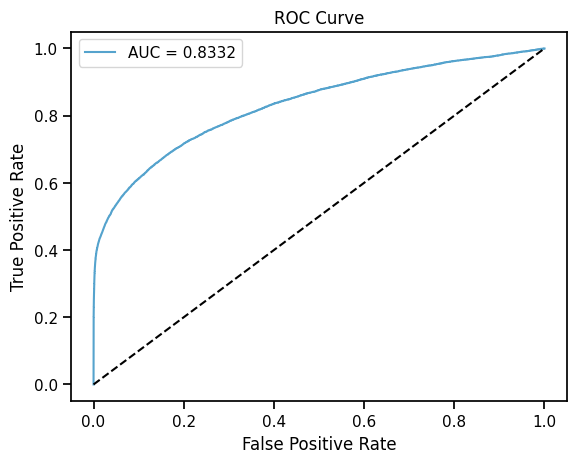

In [111]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [112]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5208')

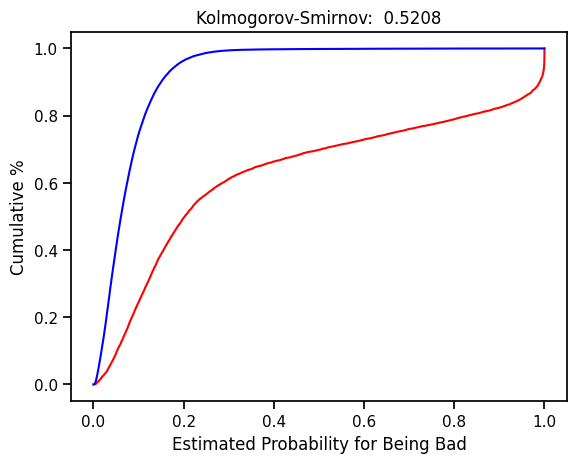

In [113]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.857` dan `KS = 0.56`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.